In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_transaction=pd.read_csv('Transactions.csv')
df_Products=pd.read_csv('Products.csv')
df_Customers=pd.read_csv('Customers.csv')

In [13]:
print(f"Shape of df_transaction : {df_transaction.shape}")
print(f"Shape of df_Products: {df_Products.shape}")
print(f"Shape of df_Customers : {df_Customers.shape}")

Shape of df_transaction : (1000, 7)
Shape of df_Products: (100, 4)
Shape of df_Customers : (200, 4)


In [14]:
print(f"Null values in df_transaction : {df_transaction.isnull().sum()}")
print(f"Null values in df_Products: {df_Products.isnull().sum()}")
print(f"Null values in df_Customers : {df_Customers.isnull().sum()}")

Null values in df_transaction : TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
Null values in df_Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Null values in df_Customers : CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [15]:
print(f"Null values in df_transaction : {df_transaction.duplicated().sum()}")
print(f"Null values in df_Products: {df_Products.duplicated().sum()}")
print(f"Null values in df_Customers : {df_Customers.duplicated().sum()}")

Null values in df_transaction : 0
Null values in df_Products: 0
Null values in df_Customers : 0


In [16]:
df_transaction.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


In [17]:
df_Customers.head(3)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [18]:
df_Products.head(3)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


In [19]:
Transactions_with_Customers = df_transaction.merge(df_Customers, on='CustomerID', how='left')
Merged_data = Transactions_with_Customers.merge(df_Products, on='ProductID', how='left')

In [20]:
Merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [21]:
Merged_data.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [22]:
Merged_data.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [23]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [24]:
Merged_data.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68


C:\Users\hp\AppData\Local\Temp\ipykernel_4788\2835220877.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_region, x="Region", y="TotalValue", palette="viridis")


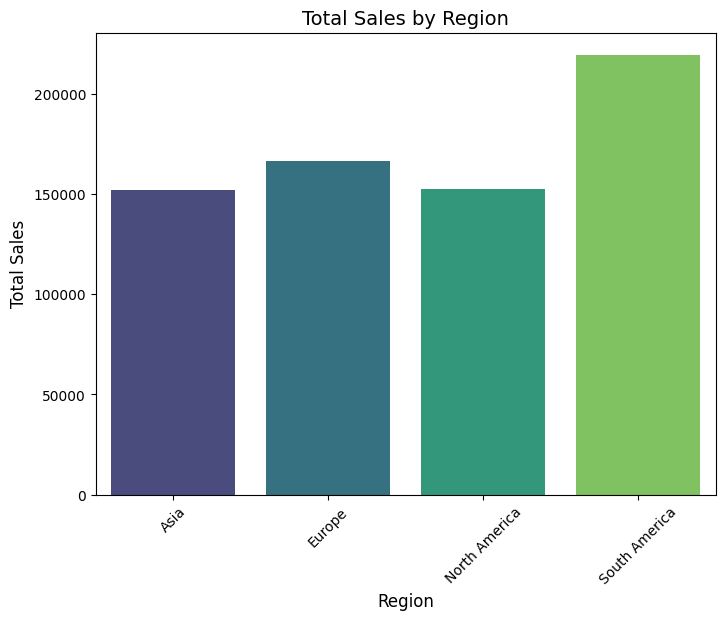

In [25]:
sales_by_region = Merged_data.groupby("Region")["TotalValue"].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_region, x="Region", y="TotalValue", palette="viridis")
plt.title("Total Sales by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4788\799798849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="ProductName", y="Quantity", palette="coolwarm")


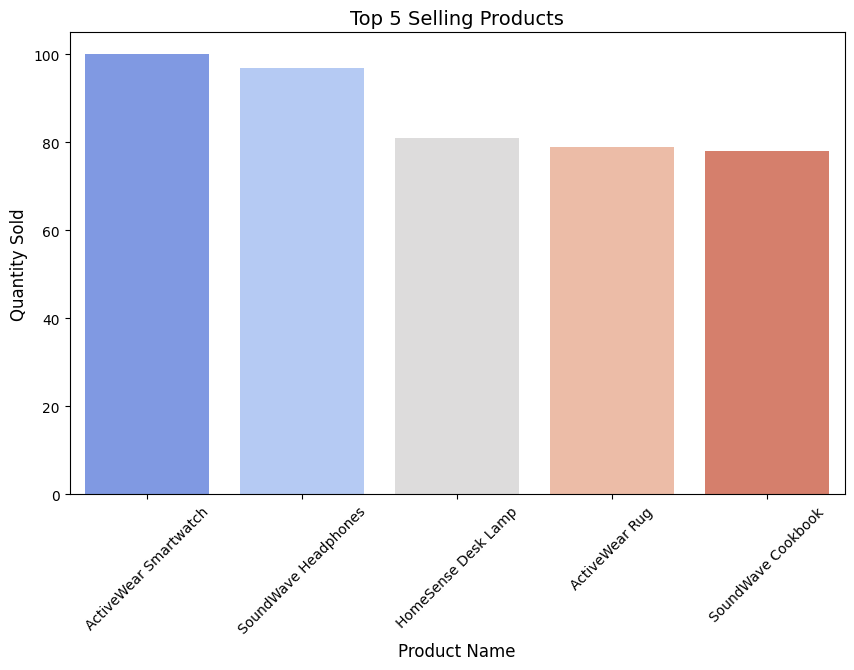

In [29]:
top_products = Merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x="ProductName", y="Quantity", palette="coolwarm")
plt.title("Top 5 Selling Products", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.show()


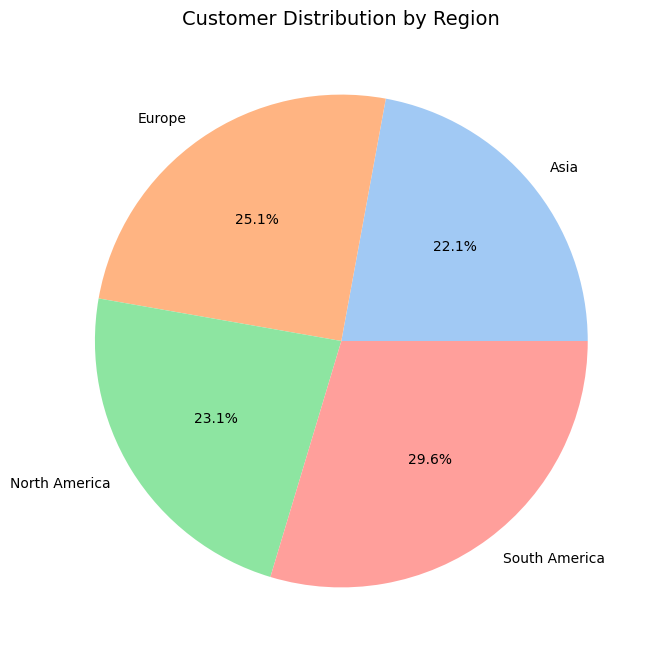

In [30]:
customers_by_region = Merged_data.groupby("Region")["CustomerID"].nunique().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(customers_by_region["CustomerID"], labels=customers_by_region["Region"], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Customer Distribution by Region", fontsize=14)
plt.show()

In [35]:
Merged_data["SignupDate"] = pd.to_datetime(Merged_data["SignupDate"], errors="coerce")

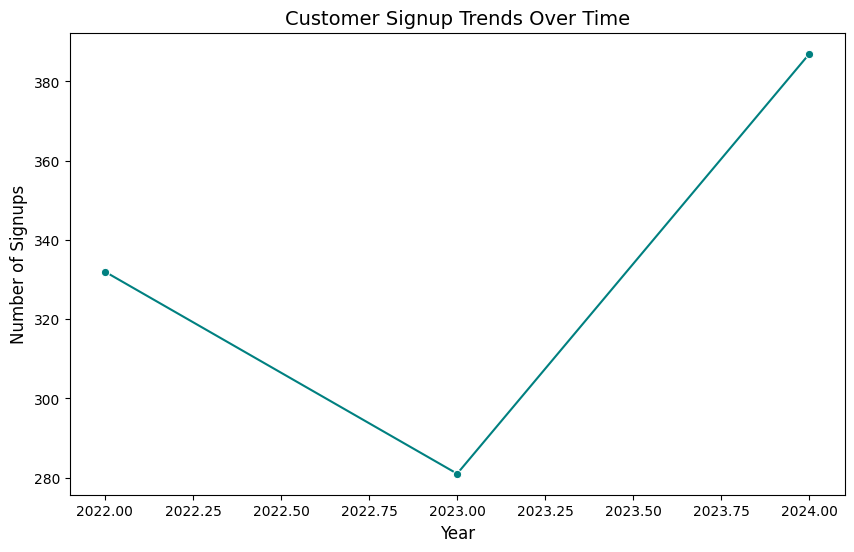

In [36]:

Merged_data["SignupYear"] = Merged_data["SignupDate"].dt.year

signup_trends = Merged_data["SignupYear"].value_counts().sort_index().reset_index()
signup_trends.columns = ["Year", "Signups"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=signup_trends, x="Year", y="Signups", marker="o", color="teal")
plt.title("Customer Signup Trends Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)
plt.show()


In [38]:
Merged_data["TransactionDate"]=pd.to_datetime(Merged_data["TransactionDate"], errors="coerce")

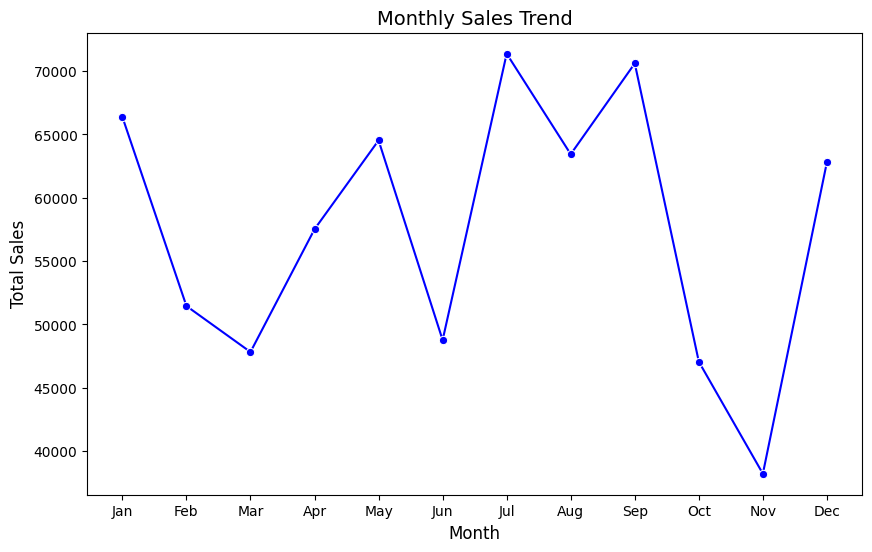

In [39]:
Merged_data["TransactionMonth"] = Merged_data["TransactionDate"].dt.month

monthly_sales = Merged_data.groupby("TransactionMonth")["TotalValue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x="TransactionMonth", y="TotalValue", marker="o", color="blue")
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_4788\369699262.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_transaction_by_region, x="Region", y="TotalValue", palette="magma")


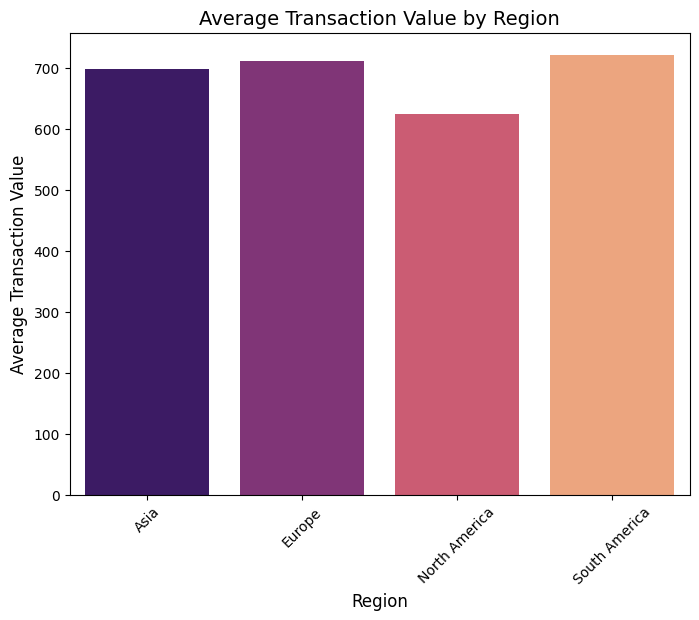

In [40]:
avg_transaction_by_region = Merged_data.groupby("Region")["TotalValue"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_transaction_by_region, x="Region", y="TotalValue", palette="magma")
plt.title("Average Transaction Value by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Transaction Value", fontsize=12)
plt.xticks(rotation=45)
plt.show()

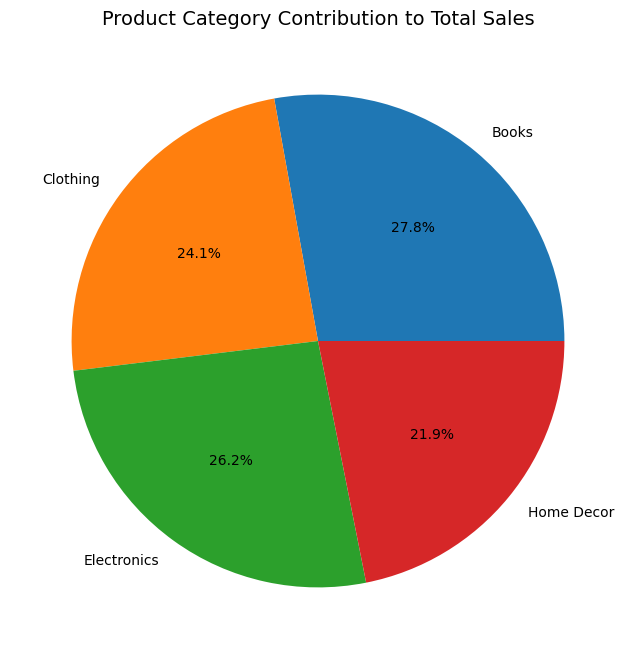

In [41]:
sales_by_category = Merged_data.groupby("Category")["TotalValue"].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(sales_by_category["TotalValue"], labels=sales_by_category["Category"], autopct='%1.1f%%', colors=sns.color_palette("tab10"))
plt.title("Product Category Contribution to Total Sales", fontsize=14)
plt.show()


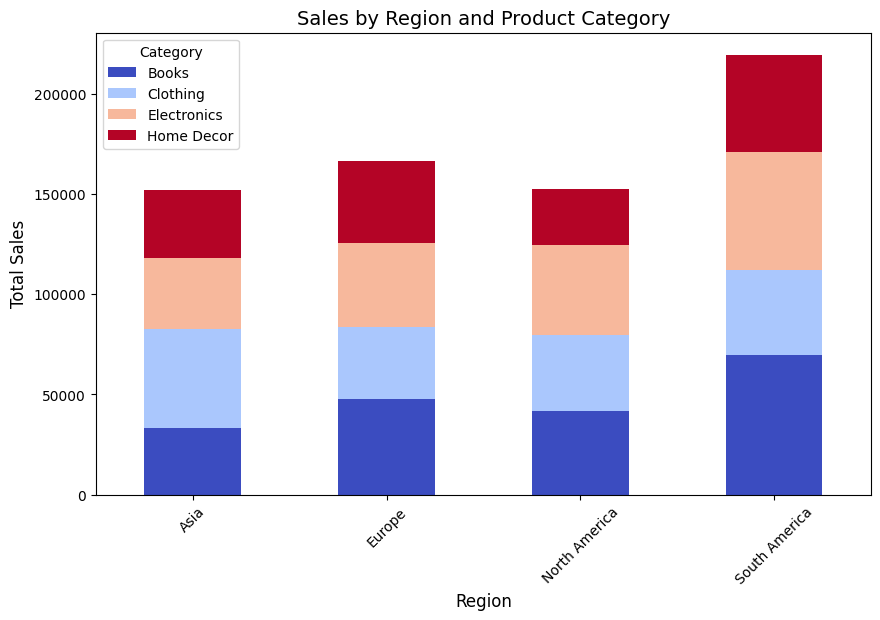

In [42]:

category_region_sales = Merged_data.pivot_table(values="TotalValue", index="Region", columns="Category", aggfunc="sum", fill_value=0)

category_region_sales.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Sales by Region and Product Category", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_4788\1105637299.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transactions_by_day, x="Day", y="Transactions", palette="Set2", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


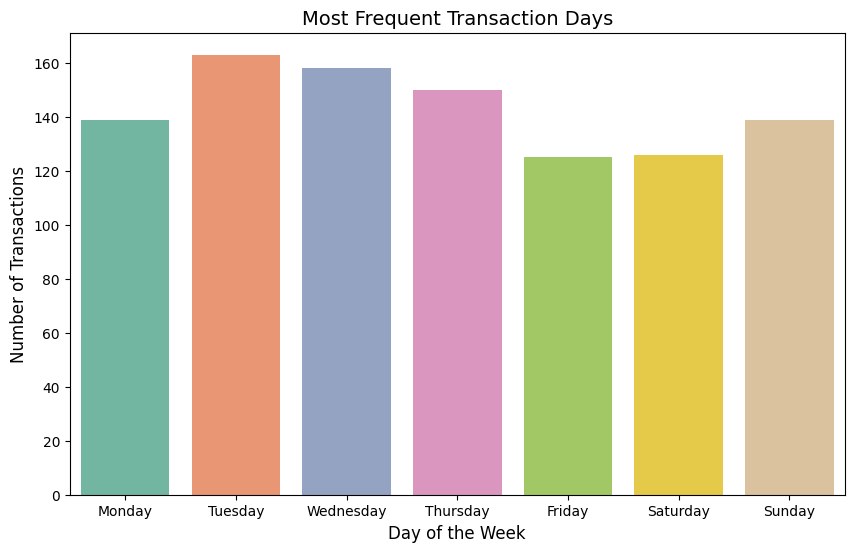

In [43]:
Merged_data["TransactionDay"] = Merged_data["TransactionDate"].dt.day_name()

transactions_by_day = Merged_data["TransactionDay"].value_counts().reset_index()
transactions_by_day.columns = ["Day", "Transactions"]

plt.figure(figsize=(10, 6))
sns.barplot(data=transactions_by_day, x="Day", y="Transactions", palette="Set2", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Most Frequent Transaction Days", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.show()


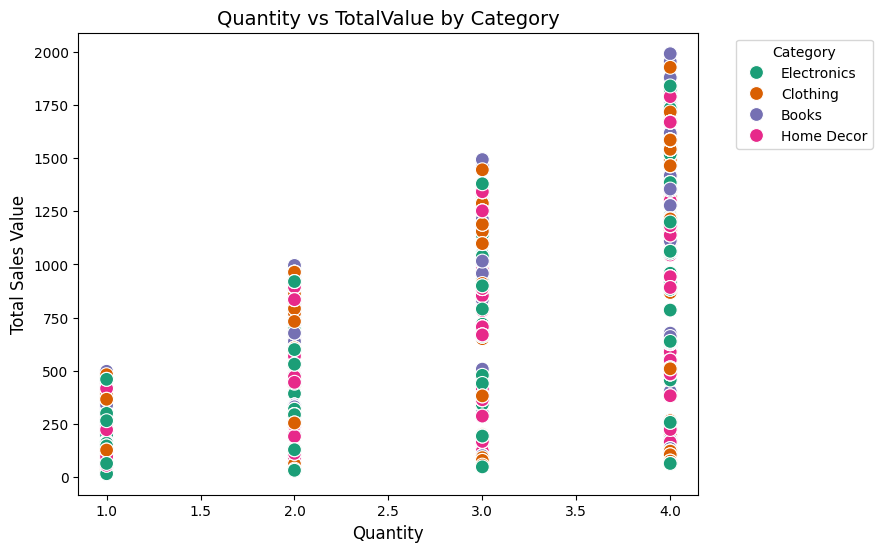

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Merged_data, x="Quantity", y="TotalValue", hue="Category", palette="Dark2", s=100)
plt.title("Quantity vs TotalValue by Category", fontsize=14)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Total Sales Value", fontsize=12)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4788\3026397383.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=signups_by_month, x="Month", y="Signups", palette="cubehelix")


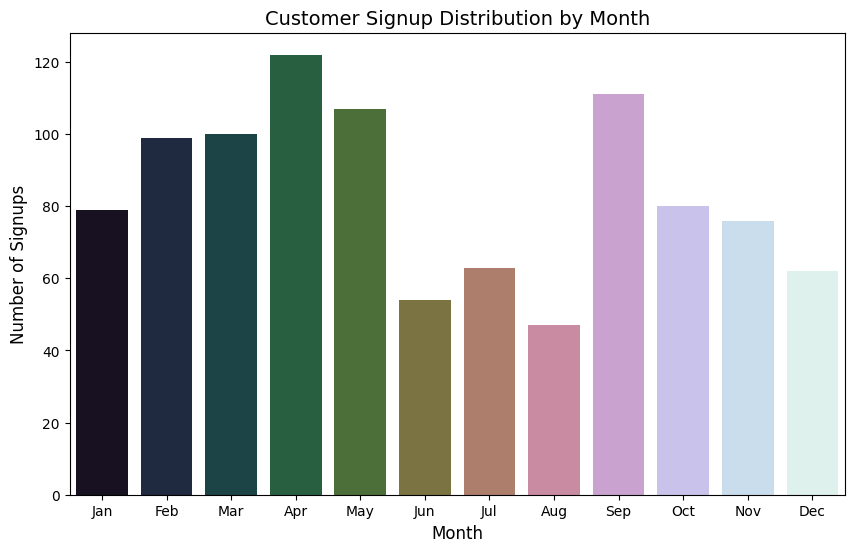

In [45]:

Merged_data["SignupMonth"] = Merged_data["SignupDate"].dt.month

signups_by_month = Merged_data["SignupMonth"].value_counts().sort_index().reset_index()
signups_by_month.columns = ["Month", "Signups"]

plt.figure(figsize=(10, 6))
sns.barplot(data=signups_by_month, x="Month", y="Signups", palette="cubehelix")
plt.title("Customer Signup Distribution by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


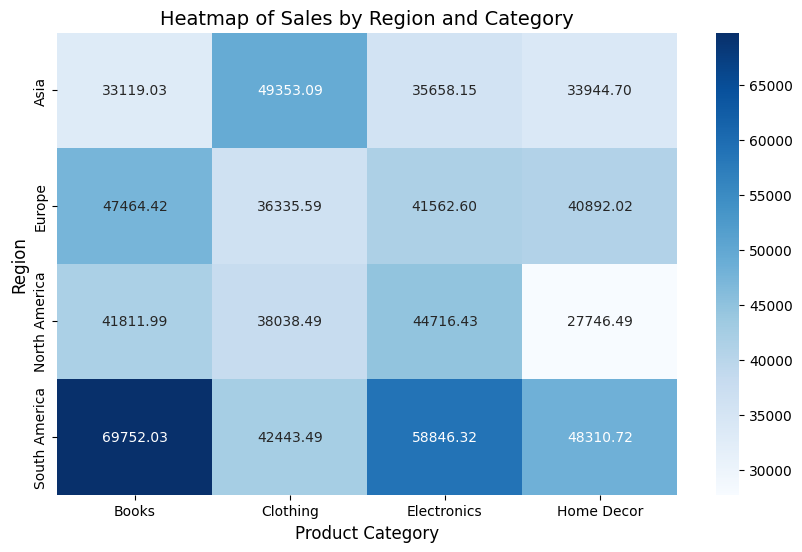

In [46]:
heatmap_data = Merged_data.pivot_table(values="TotalValue", index="Region", columns="Category", aggfunc="sum", fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues")
plt.title("Heatmap of Sales by Region and Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.show()